In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import pandas as pd
import os, time, math, tqdm, itertools
import matplotlib.pyplot as plt

import seaborn as sns


from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.feature_selection import RFECV, SequentialFeatureSelector

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold
from sklearn import metrics


import numpy as np
from keras.layers import Dense, Dropout, Input
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from keras.models import Model
from keras.models import Sequential
from keras.utils import to_categorical
from keras.callbacks import CSVLogger, ModelCheckpoint
from keras.layers import SpatialDropout1D
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import LSTM, GRU, SimpleRNN

import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
print("Tensorflow Verstion", tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Tensorflow Verstion 2.9.0
Num GPUs Available:  1


In [3]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10067295295598071593
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10750328832
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16912519581977630658
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3080 Ti, pci bus id: 0000:00:10.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [4]:
# from google.colab import files
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Reading clean cicids2017 csv file
df = pd.read_csv('cicids2017_binary_afterFeatureSelection.csv')

In [6]:
df.head(10)

,Unnamed: 0,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMin,FlowBytes/s,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATMin,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveStd,ActiveMax,ActiveMin,IdleStd,IdleMin,Label
0,0,49188.0,6.0,0.000000,0.0,3.000000e+06,4.0,4.0,4.000000,4.0,...,329.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0
1,1,49486.0,6.0,0.000000,0.0,4.000000e+06,3.0,3.0,3.000000,3.0,...,245.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0
2,2,88.0,0.0,111.967895,0.0,1.474548e+06,2.0,609.0,101.500000,2.0,...,8192.0,2053.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0
3,3,88.0,0.0,136.153814,0.0,4.232082e+06,1.0,879.0,109.875000,1.0,...,8192.0,2053.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0
4,4,88.0,0.0,682.482560,0.0,5.329310e+06,1.0,1160.0,145.000000,1.0,...,8192.0,2053.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0
5,5,88.0,0.0,679.914876,0.0,1.074809e+07,1.0,524.0,87.333333,1.0,...,8192.0,2053.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0
6,6,1034.0,6.0,0.000000,6.0,2.000000e+06,6.0,0.0,0.000000,0.0,...,2053.0,251.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0
7,7,88.0,0.0,688.214982,0.0,5.558534e+06,1.0,1119.0,139.875000,1.0,...,8192.0,2053.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0
8,8,389.0,0.0,612.974034,0.0,5.378170e+05,1.0,18378.0,1531.500000,3.0,...,8192.0,0.0,11.0,20.0,0.0,0.0,0.0,0.0,0.0,0
9,9,88.0,0.0,105.626476,0.0,9.902676e+05,1.0,822.0,137.000000,1.0,...,8192.0,2053.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
print(df.shape)

(2425727, 42)

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'DestinationPort', 'FwdPacketLengthMin',
       'FwdPacketLengthStd', 'BwdPacketLengthMin', 'FlowBytes/s', 'FlowIATMin',
       'FwdIATTotal', 'FwdIATMean', 'FwdIATMin', 'BwdIATTotal', 'BwdIATStd',
       'BwdIATMax', 'BwdIATMin', 'BwdHeaderLength', 'FwdPackets/s',
       'BwdPackets/s', 'MinPacketLength', 'PacketLengthVariance',
       'FINFlagCount', 'SYNFlagCount', 'PSHFlagCount', 'ACKFlagCount',
       'URGFlagCount', 'CWEFlagCount', 'ECEFlagCount', 'Down/UpRatio',
       'AvgFwdSegmentSize', 'AvgBwdSegmentSize', 'FwdHeaderLength.1',
       'SubflowFwdBytes', 'SubflowBwdBytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'ActiveStd', 'ActiveMax', 'ActiveMin', 'IdleStd', 'IdleMin', 'Label'],
      dtype='object')

In [9]:
# drop columns Unnamed  0
df = df.drop(columns = 'Unnamed: 0')
df.head()

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMin,FlowBytes/s,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATMin,BwdIATTotal,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveStd,ActiveMax,ActiveMin,IdleStd,IdleMin,Label
0,49188.0,6.0,0.000000,0.0,3.000000e+06,4.0,4.0,4.000,4.0,0.0,...,329.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0
1,49486.0,6.0,0.000000,0.0,4.000000e+06,3.0,3.0,3.000,3.0,0.0,...,245.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0
2,88.0,0.0,111.967895,0.0,1.474548e+06,2.0,609.0,101.500,2.0,467.0,...,8192.0,2053.0,5.0,20.0,0.0,0.0,0.0,0.0,0.0,0
3,88.0,0.0,136.153814,0.0,4.232082e+06,1.0,879.0,109.875,1.0,764.0,...,8192.0,2053.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0
4,88.0,0.0,682.482560,0.0,5.329310e+06,1.0,1160.0,145.000,1.0,1022.0,...,8192.0,2053.0,7.0,20.0,0.0,0.0,0.0,0.0,0.0,0


# shuffle rows randomly

In [10]:
# considering only fifty percent of data
df=df.sample(frac=0.5).reset_index(drop=True)
df

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMin,FlowBytes/s,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATMin,BwdIATTotal,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveStd,ActiveMax,ActiveMin,IdleStd,IdleMin,Label
0,443.0,0.0,130.149010,0.0,1.056270e+02,8.0,61300000.0,3.828331e+06,222.0,61200000.0,...,29200.0,114.0,3.0,32.0,149803.1501,413300.0,46194.0,109126.445,9948641.0,0
1,80.0,0.0,139.815116,0.0,1.771640e+02,1.0,67400000.0,1.350000e+07,1.0,67500000.0,...,0.0,235.0,3.0,20.0,0.0000,16027.0,16027.0,0.000,67300000.0,1
2,53.0,46.0,0.707107,74.0,3.366775e+00,23988.0,98800000.0,9.880000e+07,98800000.0,98900000.0,...,-1.0,-1.0,1.0,20.0,0.0000,23988.0,23988.0,0.000,98800000.0,0
3,58061.0,6.0,154.729872,0.0,2.353909e+05,3.0,1215.0,6.075000e+02,3.0,0.0,...,60.0,-1.0,2.0,20.0,0.0000,0.0,0.0,0.000,0.0,0
4,5989.0,0.0,0.000000,6.0,7.500000e+04,80.0,0.0,0.000000e+00,0.0,0.0,...,29200.0,0.0,0.0,40.0,0.0000,0.0,0.0,0.000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212859,443.0,0.0,268.528763,0.0,1.671798e+03,3.0,160953.0,2.299329e+04,109.0,5081993.0,...,8192.0,25.0,7.0,20.0,0.0000,0.0,0.0,0.000,0.0,0
1212860,80.0,6.0,0.000000,0.0,1.001837e+03,24.0,11978.0,1.197800e+04,11978.0,0.0,...,0.0,235.0,1.0,20.0,0.0000,0.0,0.0,0.000,0.0,1
1212861,52821.0,6.0,0.000000,0.0,4.000000e+06,3.0,3.0,3.000000e+00,3.0,0.0,...,127.0,-1.0,1.0,20.0,0.0000,0.0,0.0,0.000,0.0,0
1212862,443.0,0.0,198.013705,0.0,6.609602e+02,1.0,116000000.0,2.646597e+06,1.0,111000000.0,...,29200.0,1101.0,7.0,32.0,176696.3638,636286.0,23506.0,1357106.239,5319655.0,0


In [11]:
df.tail(20)

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMin,FlowBytes/s,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATMin,BwdIATTotal,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveStd,ActiveMax,ActiveMin,IdleStd,IdleMin,Label
1212844,53.0,65.0,0.000000,142.0,1.695471e+04,3.0,3.0,3.000000e+00,3.0,49.0,...,-1.0,-1.0,1.0,20.0,0.00000,0.0,0.0,0.000000e+00,0.0,0
1212845,443.0,0.0,121.659132,0.0,7.351518e+02,4.0,5733510.0,7.166888e+05,4.0,306861.0,...,8192.0,980.0,7.0,20.0,0.00000,341042.0,341042.0,0.000000e+00,5392464.0,0
1212846,443.0,0.0,343.365754,0.0,4.099676e+02,1.0,116000000.0,2.326232e+06,1.0,111000000.0,...,29200.0,429.0,7.0,32.0,241534.54350,837484.0,36168.0,1.721029e+04,9960003.0,0
1212847,443.0,0.0,77.293686,0.0,8.220780e+01,1.0,116000000.0,5.531859e+06,49.0,111000000.0,...,8192.0,31.0,15.0,20.0,143570.13460,512411.0,14983.0,1.308025e+06,5470718.0,0
1212848,53.0,33.0,0.000000,65.0,3.221935e+03,3.0,48.0,4.800000e+01,48.0,3.0,...,-1.0,-1.0,1.0,32.0,0.00000,0.0,0.0,0.000000e+00,0.0,0
1212849,53.0,36.0,0.000000,143.0,4.218862e+03,3.0,3.0,3.000000e+00,3.0,4.0,...,-1.0,-1.0,1.0,40.0,0.00000,0.0,0.0,0.000000e+00,0.0,0
1212850,53.0,42.0,0.000000,196.0,3.968366e+03,3.0,61143.0,2.038100e+04,3.0,3.0,...,-1.0,-1.0,3.0,20.0,0.00000,0.0,0.0,0.000000e+00,0.0,0
1212851,53.0,35.0,0.000000,51.0,5.517595e+03,3.0,3.0,3.000000e+00,3.0,3.0,...,-1.0,-1.0,1.0,32.0,0.00000,0.0,0.0,0.000000e+00,0.0,0
1212852,53.0,42.0,0.000000,114.0,1.013777e+04,1.0,1.0,1.000000e+00,1.0,4.0,...,-1.0,-1.0,1.0,32.0,0.00000,0.0,0.0,0.000000e+00,0.0,0
1212853,53.0,55.0,0.000000,110.0,5.362889e+03,30767.0,0.0,0.000000e+00,0.0,0.0,...,-1.0,-1.0,0.0,20.0,0.00000,0.0,0.0,0.000000e+00,0.0,0


# Train and Test Dataset

In [12]:
# put labels into y_train variable
Y = df["Label"]
# Drop 'label' column
X = df.drop(labels = ["Label"],axis = 1)

In [13]:
X.shape, Y.shape

((1212864, 40), (1212864,))

In [14]:
df['Label'].unique()

array([0, 1])

In [15]:
df["Label"].value_counts()

Label
0    1017287
1     195577
Name: count, dtype: int64

In [16]:
type(X)

pandas.core.frame.DataFrame

In [17]:
features = list(X.columns)
features

['DestinationPort',
 'FwdPacketLengthMin',
 'FwdPacketLengthStd',
 'BwdPacketLengthMin',
 'FlowBytes/s',
 'FlowIATMin',
 'FwdIATTotal',
 'FwdIATMean',
 'FwdIATMin',
 'BwdIATTotal',
 'BwdIATStd',
 'BwdIATMax',
 'BwdIATMin',
 'BwdHeaderLength',
 'FwdPackets/s',
 'BwdPackets/s',
 'MinPacketLength',
 'PacketLengthVariance',
 'FINFlagCount',
 'SYNFlagCount',
 'PSHFlagCount',
 'ACKFlagCount',
 'URGFlagCount',
 'CWEFlagCount',
 'ECEFlagCount',
 'Down/UpRatio',
 'AvgFwdSegmentSize',
 'AvgBwdSegmentSize',
 'FwdHeaderLength.1',
 'SubflowFwdBytes',
 'SubflowBwdBytes',
 'Init_Win_bytes_forward',
 'Init_Win_bytes_backward',
 'act_data_pkt_fwd',
 'min_seg_size_forward',
 'ActiveStd',
 'ActiveMax',
 'ActiveMin',
 'IdleStd',
 'IdleMin']

In [18]:
#Scalling numerical attributes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Turn back to dataframe
X = pd.DataFrame(X_scaled, columns=features)
X

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMin,FlowBytes/s,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATMin,BwdIATTotal,...,SubflowBwdBytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveStd,ActiveMax,ActiveMin,IdleStd,IdleMin
0,-0.437759,-0.312001,0.164039,-0.605441,-0.052435,-0.056579,1.242549,0.078117,-0.127441,1.617777,...,-0.005126,1.498544,-0.242057,-0.004281,0.002520,0.238611,0.214423,-0.034957,-0.096127,0.026477
1,-0.456629,-0.312001,0.195945,-0.605441,-0.052433,-0.056581,1.413294,1.028833,-0.127465,1.822928,...,-0.002507,-0.496743,-0.228723,-0.004281,0.002508,-0.110884,-0.146453,-0.084233,-0.118113,2.314452
2,-0.458032,0.435720,-0.263217,0.430126,-0.052439,-0.048711,2.292208,9.413741,10.609694,2.845422,...,-0.007504,-0.496811,-0.254729,-0.007555,0.002508,-0.110884,-0.139222,-0.071230,-0.118113,3.571113
3,2.557350,-0.214472,0.245175,-0.605441,-0.043738,-0.056581,-0.473259,-0.298144,-0.127465,-0.375110,...,-0.007610,-0.492643,-0.254729,-0.005918,0.002508,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414
4,-0.149466,-0.312001,-0.265551,-0.521476,-0.049667,-0.056555,-0.473293,-0.298204,-0.127465,-0.375110,...,-0.007607,1.498544,-0.254619,-0.009192,0.002527,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1212859,-0.437759,-0.312001,0.620797,-0.605441,-0.052377,-0.056581,-0.468787,-0.295944,-0.127453,-0.209623,...,-0.004440,0.063031,-0.251864,0.002268,0.002508,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414
1212860,-0.456629,-0.214472,-0.265551,-0.605441,-0.052402,-0.056574,-0.472957,-0.297026,-0.126163,-0.375110,...,-0.007610,-0.496743,-0.228723,-0.007555,0.002508,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414
1212861,2.284964,-0.214472,-0.265551,-0.605441,0.095419,-0.056581,-0.473293,-0.298204,-0.127465,-0.375110,...,-0.007610,-0.488065,-0.254729,-0.007555,0.002508,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414
1212862,-0.437759,-0.312001,0.388044,-0.605441,-0.052415,-0.056581,2.773651,-0.038046,-0.127465,3.239441,...,0.024842,1.498544,-0.133294,0.002268,0.002520,0.301353,0.416980,-0.072017,0.155308,-0.158192


In [19]:
28425727*0.8



22740581.6

In [20]:
X["Label"] = Y

In [21]:
X.shape

(1212864, 41)

In [22]:
X.head()

,DestinationPort,FwdPacketLengthMin,FwdPacketLengthStd,BwdPacketLengthMin,FlowBytes/s,FlowIATMin,FwdIATTotal,FwdIATMean,FwdIATMin,BwdIATTotal,...,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,ActiveStd,ActiveMax,ActiveMin,IdleStd,IdleMin,Label
0,-0.437759,-0.312001,0.164039,-0.605441,-0.052435,-0.056579,1.242549,0.078117,-0.127441,1.617777,...,1.498544,-0.242057,-0.004281,0.002520,0.238611,0.214423,-0.034957,-0.096127,0.026477,0
1,-0.456629,-0.312001,0.195945,-0.605441,-0.052433,-0.056581,1.413294,1.028833,-0.127465,1.822928,...,-0.496743,-0.228723,-0.004281,0.002508,-0.110884,-0.146453,-0.084233,-0.118113,2.314452,1
2,-0.458032,0.435720,-0.263217,0.430126,-0.052439,-0.048711,2.292208,9.413741,10.609694,2.845422,...,-0.496811,-0.254729,-0.007555,0.002508,-0.110884,-0.139222,-0.071230,-0.118113,3.571113,0
3,2.557350,-0.214472,0.245175,-0.605441,-0.043738,-0.056581,-0.473259,-0.298144,-0.127465,-0.375110,...,-0.492643,-0.254729,-0.005918,0.002508,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414,0
4,-0.149466,-0.312001,-0.265551,-0.521476,-0.049667,-0.056555,-0.473293,-0.298204,-0.127465,-0.375110,...,1.498544,-0.254619,-0.009192,0.002527,-0.110884,-0.161012,-0.110413,-0.118113,-0.370414,1


In [24]:
X_train = X[: int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]

In [25]:
X_train.shape, X_test.shape

((970291, 41), (242573, 41))

In [26]:
type(X_train), type(X_test)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [27]:
# Train and test dataset creation
y_train = X_train["Label"]
# Drop 'label' column
X_train = X_train.drop(labels = ["Label"],axis = 1)

y_test = X_test["Label"]
X_test = X_test.drop(labels=["Label"], axis = 1)



In [28]:
type(X_train), type(X_test), type(y_train), type(y_test)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.series.Series,
 pandas.core.series.Series)

In [29]:
y_train.shape, y_test.shape

((970291,), (242573,))

In [30]:
y_train

0         0
1         1
2         0
3         0
4         1
         ..
970286    0
970287    0
970288    0
970289    0
970290    0
Name: Label, Length: 970291, dtype: int64

# to categorical data

In [31]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
y_train.shape, y_test.shape

((970291, 2), (242573, 2))

In [33]:
type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray)

In [34]:
# changing dataframe into numpy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

In [35]:
X_train.shape, X_test.shape

((970291, 40), (242573, 40))

In [36]:
type(X_train), type(y_train), type(y_train), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

# Re shaping train and test dataset for CNN

In [46]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((970291, 40), (970291, 2), (242573, 40), (242573, 2))

In [47]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

X_train.shape, X_test.shape

((970291, 40, 1), (242573, 40, 1))

In [48]:
len(X_train)

970291

# Building a first simple CNN Model

In [49]:
def model4():
  model = Sequential()
  model.add(Conv1D(filters=32, kernel_size = 3, activation='relu', input_shape=(40, 1)))
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(Dropout(0.25))

  model.add(Conv1D(filters=64, kernel_size = 3, activation='relu', input_shape=(40, 1)))
  model.add(MaxPooling1D(pool_size=(2)))

  model.add(Conv1D(filters=128, kernel_size = 3, activation='relu', input_shape=(40, 1)))
  model.add(MaxPooling1D(pool_size=(2)))
  model.add(Dropout(0.25))


  model.add(LSTM(128))
  
  model.add(Dense(2, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

  return model


model = model4()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 38, 32)            128       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 32)            0         
                                                                 
 conv1d_1 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 64)            0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 6, 128)            2

In [53]:
# model parameters
epochs = 50
batch_size = 128

# Training the model


In [54]:
checkpoint_filepath = 'logCNNLSTM/checkpoint-{epoch:02d}-{val_loss:.3f}.hdf5'
my_callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=6),
    tf.keras.callbacks.ModelCheckpoint(checkpoint_filepath),
    tf.keras.callbacks.CSVLogger('logger/cnnLSTM1.csv',separator=',', append=False)
#     tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]
history1 = model.fit(X_train,
                     y_train,
                     epochs = epochs,
                     batch_size = batch_size,
                     validation_split = 0.2,
                    #  validation_data = (X_val, y_val),
                     callbacks=[my_callbacks]
                     )
model.save('cnnLSTM1.h5')



Epoch 1/50


2023-07-10 04:23:36.787824: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2023-07-10 04:23:36.789571: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


6065/6065 [==============================] - 82s 13ms/step - loss: 0.0650 - accuracy: 0.9739 - val_loss: 0.0407 - val_accuracy: 0.9839
Epoch 2/50
6065/6065 [==============================] - 78s 13ms/step - loss: 0.0421 - accuracy: 0.9826 - val_loss: 0.0370 - val_accuracy: 0.9848
Epoch 3/50
6065/6065 [==============================] - 78s 13ms/step - loss: 0.0382 - accuracy: 0.9839 - val_loss: 0.0351 - val_accuracy: 0.9853
Epoch 4/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0360 - accuracy: 0.9846 - val_loss: 0.0328 - val_accuracy: 0.9852
Epoch 5/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0345 - accuracy: 0.9849 - val_loss: 0.0297 - val_accuracy: 0.9863
Epoch 6/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0335 - accuracy: 0.9855 - val_loss: 0.0305 - val_accuracy: 0.9861
Epoch 7/50
6065/6065 [==============================] - 80s 13ms/step - loss: 0.0323 - accuracy: 0.9862 - val_loss: 0.0308 - val_accura

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6065/6065 [==============================] - 79s 13ms/step - loss: 0.0302 - accuracy: 0.9870 - val_loss: 0.0289 - val_accuracy: 0.9863
Epoch 16/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0301 - accuracy: 0.9871 - val_loss: 0.0282 - val_accuracy: 0.9872
Epoch 17/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0301 - accuracy: 0.9871 - val_loss: 0.0280 - val_accuracy: 0.9885
Epoch 18/50
6065/6065 [==============================] - 78s 13ms/step - loss: 0.0298 - accuracy: 0.9872 - val_loss: 0.0261 - val_accuracy: 0.9887
Epoch 19/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0291 - accuracy: 0.9876 - val_loss: 0.0272 - val_accuracy: 0.9887
Epoch 20/50
1692/6065 [=======>......................] - ETA: 51s - loss: 0.0290 - accuracy: 0.9878

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6065/6065 [==============================] - 79s 13ms/step - loss: 0.0278 - accuracy: 0.9883 - val_loss: 0.0251 - val_accuracy: 0.9897
Epoch 27/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0273 - accuracy: 0.9886 - val_loss: 0.0232 - val_accuracy: 0.9906
Epoch 28/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0277 - accuracy: 0.9885 - val_loss: 0.0235 - val_accuracy: 0.9906
Epoch 29/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0279 - accuracy: 0.9882 - val_loss: 0.0247 - val_accuracy: 0.9892
Epoch 30/50
6065/6065 [==============================] - 80s 13ms/step - loss: 0.0279 - accuracy: 0.9883 - val_loss: 0.0245 - val_accuracy: 0.9898
Epoch 31/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0273 - accuracy: 0.9887 - val_loss: 0.0249 - val_accuracy: 0.9893
Epoch 32/50
6065/6065 [==============================] - 79s 13ms/step - loss: 0.0271 - accuracy: 0.9887 - val_loss: 0.0237 - val_

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [72]:
 #check history of model
history = history1.history
history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

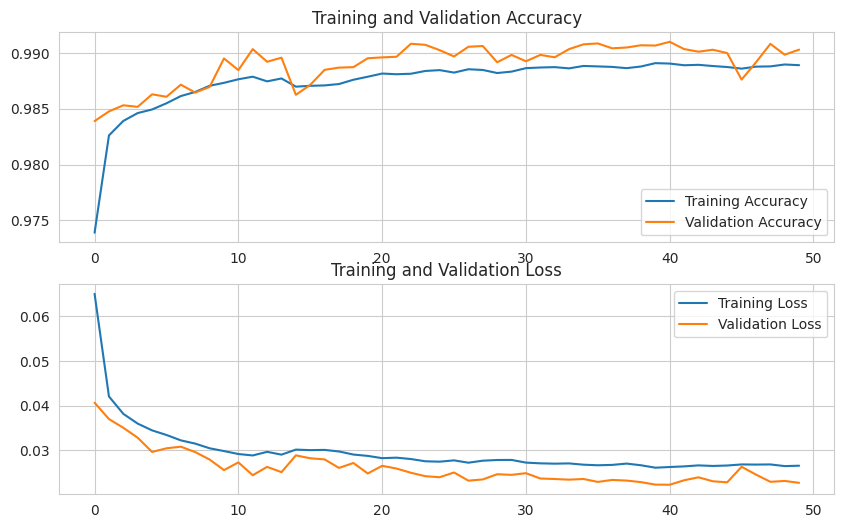

In [73]:
epochs = history1.history['loss']
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 6), dpi=100)
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig("graph_CNNLSTM1.png")
plt.show()

# Prediction

In [74]:
#  check the model performance on test data
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

7581/7581 [==============================] - 50s 7ms/step - loss: 0.0227 - accuracy: 0.9904
accuracy: 99.04%


In [75]:
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.02268317900598049
Test accuracy: 0.9904400110244751


In [76]:
# predict
predictions = model.predict(X_test)


7581/7581 [==============================] - 42s 5ms/step


In [77]:
predictions.shape

(242573, 2)

In [78]:
pred = np.argmax(predictions, axis = 1)[:20]
label = np.argmax(y_test,axis = 1)[:20]
print("Predicted Class: {}".format(pred))
print("Actual label: {}".format(label))

Predicted Class: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
Actual label: [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]


# Confustion Matrix

7581/7581 [==============================] - 40s 5ms/step


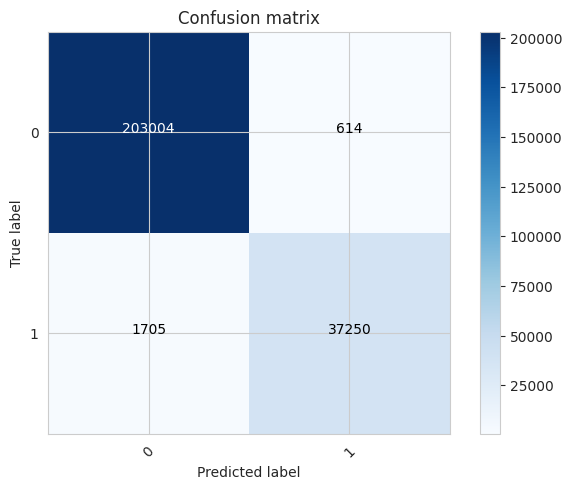

In [79]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)



# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(2))

# Now, lets which category has much incorrect predictions

Text(0, 0.5, 'Fraction classified incorrectly')

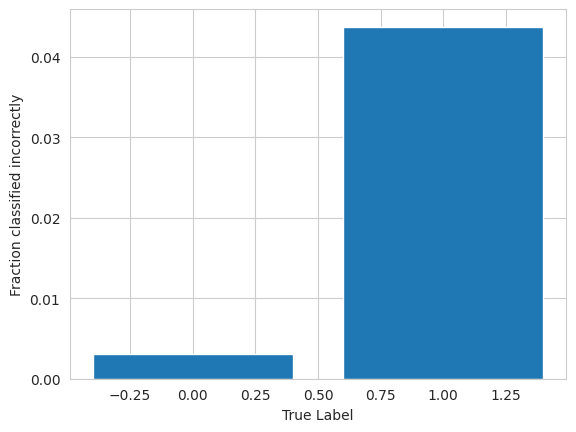

In [80]:
label_frac_error = 1 - np.diag(confusion_mtx) / np.sum(confusion_mtx, axis=1)
plt.bar(np.arange(2),label_frac_error)
plt.xlabel('True Label')
plt.ylabel('Fraction classified incorrectly')

# Classificaiton report

In [81]:
confusion_mtx

array([[203004,    614],
       [  1705,  37250]])

In [82]:
confusion_mtx.shape

(2, 2)

In [83]:
y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

7581/7581 [==============================] - 40s 5ms/step
Confusion Matrix
[[203004    614]
 [  1705  37250]]


In [84]:
TP = confusion_mtx[0][0]
FP = confusion_mtx[0][1]
FN = confusion_mtx[1][0]
TN = confusion_mtx[1][1]

TP, FP, FN, TN

(203004, 614, 1705, 37250)

In [85]:
np.argmax(y_test[:10],axis=1)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [86]:
Y_pred[:10]

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [87]:
def performance_evaluation(TP, FP, FN, TN):
    Accuracy  = (TP+TN)/(TP+TN+FP+FN)
    Precision = TP/(TP + FP)
    Recall = TP/(TP+FN)
    F1_Score = 2 * (Precision * Recall)/(Precision + Recall)
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1_Score: ", F1_Score)

performance_evaluation(TP, FP, FN, TN)

Accuracy:  0.9904399912603629
Precision:  0.9969845494995531
Recall:  0.9916711038596251
F1_Score:  0.9943207282398666
